In [43]:
# coding: utf-8

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from sklearn import svm  #svm导入
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ChangedBehaviorWarning
from sklearn import svm, datasets

In [44]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore', category=ChangedBehaviorWarning)

In [45]:
## 读取数据

# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
#path = './datas/iris.data'  # 数据文件路径
#data = pd.read_csv(path, header=None)
#X, y = data[list(range(4))], data[4]
#y = pd.Categorical(y).codes #把文本数据进行编码，比如a b c编码为 0 1 2
#X = X[[0, 1]]

# 导入数据以便后续使用
iris = datasets.load_iris()
# 采用前两个特征。我们可以通过使用二维数据集来避免使用切片。
X = iris.data[:, :2]
y = iris.target


## 数据分割
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)

"""API 说明：
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
引用： from sklearn.svm import SVC
功能： 使用SVM分类器进行模型构建
参数说明：
C: 误差项的惩罚系数，默认为1.0；一般为大于0的一个数字，C越大表示在训练过程中对于总误差的关注度越高，也就是说当C越大的时候，对于训练集的表现会越好，但是有可能引发过度拟合的问题； (overfiting)
kernel：指定SVM内部函数的类型，可选值：linear、poly、rbf、sigmoid、precomputed(基本不用，有前提要求，要求特征属性数目和样本数目一样)；默认是rbf；
degree：当使用多项式函数作为svm内部的函数的时候，给定多项式的项数，默认为3;
gamma：当SVM内部使用poly、rbf、sigmoid的时候，核函数的系数值，当默认值为auto的时候，实际系数为1/n_features;
coef0：当核函数为poly或者sigmoid的时候，给定的独立系数，默认为0;
probability：是否启用概率估计，默认不启动，不太建议启动;
shrinking：是否开启收缩启发式计算，默认为True;
tol: 模型构建收敛参数，当模型的的误差变化率小于该值的时候，结束模型构建过程，默认值:1e-3;
cache_size：在模型构建过程中，缓存数据的最大内存大小，默认为空，单位MB;
class_weight：给定各个类别的权重，默认为空;
max_iter：最大迭代次数，默认-1表示不限制;
decision_function_shape：决策函数，可选值：ovo和ovr，默认为None；推荐使用ovr；1.7以上版本才有。

数据SVM分类器构建
gamma值越大，训练集的拟合就越好，但是会造成过拟合，导致测试集拟合变差。
gamma值越小，模型的泛化能力越好，训练集和测试集的拟合相近，但是会导致训练集出现欠拟合问题，从而准确率变低，导致测试集准确率也变低。

作者：白尔摩斯
链接：https://www.jianshu.com/p/cd94efc78b6b
来源：简书
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。
"""


In [46]:
clf = SVC(C=1,kernel='rbf',gamma=0.1)

## 模型训练
clf.fit(x_train, y_train)

SVC(C=1, gamma=0.1)

In [47]:
# 计算模型的准确率/精度
print (clf.score(x_train, y_train))
print ('训练集准确率：', accuracy_score(y_train, clf.predict(x_train)))
print (clf.score(x_test, y_test))
print ('测试集准确率：', accuracy_score(y_test, clf.predict(x_test)))

0.85
训练集准确率： 0.85
0.7333333333333333
测试集准确率： 0.7333333333333333


C:\Users\yalin\AppData\Local\Temp/ipykernel_19296/2374048322.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)


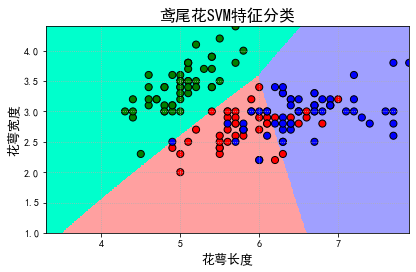

In [50]:
N = 500
#画分界线
x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()
x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点


grid_hat = clf.predict(grid_show)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

cm_light = mpl.colors.ListedColormap(['#00FFCC', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w')
## 区域图
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()